## Лабораторна робота 5,6

В темі 4 «Лінійні методи для виявлення аномалій» ми дізналися про лінійні методи, які використовуються для виявлення аномалій: лінійна регресія, аналіз головних компонент (PCA) і однокласові опорні векторні машини (SVM).

Тут будуть застосовані всі три методи для виявлення аномалій у синтетичних і реальних даних.

Результати навчання:

1. Практичний досвід роботи з моделями лінійної регресії

2. Практичний досвід роботи з PCA

3. Практичний досвід роботи з однокласними SVM

### Імпорт

In [1]:
import numpy as np
np.set_printoptions(suppress=True, precision=4)

import sys
import matplotlib.pyplot as plt
import sklearn.decomposition as decomp
import sklearn.linear_model as linear_model
import sklearn.datasets as sk_data
from sklearn.preprocessing import StandardScaler
import numpy.linalg as nla
import sklearn.svm as svm
import pandas as pd

## Розділ 1: Моделі лінійної регресії
У цьому розділі ми збираємося використовувати синтетичні набори даних для виявлення аномалій за допомогою лінійної регресії. У вправах ми застосуємо те, що навчилися, до реального набору даних.

Ключова ідея: відхилення від регресійної моделі, тобто різниця між фактичним значенням і прогнозованим значенням, є показником того, наскільки аномальною є точка.

Нагадуємо, як моделі лінійної регресії використовуються для виявлення аномалій:

1. Розділіть дані на навчальні та тестові набори даних

2. Використовуйте набори даних для (i) отримання параметрів регресійної моделі та (ii) визначення порогового значення для аномалій

3. Застосуйте результати до тестових даних, щоб виявити аномалії

### Дані
Тут ми будемо працювати з даними, показаними на лекції: іспитовою оцінкою та витраченими годинами.

In [2]:
# Приблизно лінійні дані
exam_data1 = np.array([[1, 2, 3, 4, 5],
                    [57, 70, 76, 84, 91]]).T
print(exam_data1)

[[ 1 57]
 [ 2 70]
 [ 3 76]
 [ 4 84]
 [ 5 91]]


Для кожної пари точок даних перше значення – це кількість годин навчання, а друге – оцінка за іспит (зі 100).

In [3]:
# Одна аномалія замінює нормальну точку
exam_data2 = np.array([[1, 2, 3, 4, 5],
                      [57, 70, 99, 84, 91]]).T
print(exam_data2)

[[ 1 57]
 [ 2 70]
 [ 3 99]
 [ 4 84]
 [ 5 91]]


Аномалія (3, 99).

Щоб спростити нашу роботу, ми введемо допоміжну функцію, яка малює пряму лінію з урахуванням нахилу, перерізу, осей (для створення фігури) та стилю лінії (для побудови кількох ліній на одному графіку).

In [4]:
def plot_mb(m, b, ax, style):
    'plot a line y=mx+b on a matplotlib axis'
    xs = ax.get_xlim()
    ax.plot(xs, m*xs + b, style) #style is type of line

### Аналіз
Побудуйте два набори даних разом, щоб ми могли легко їх порівняти.

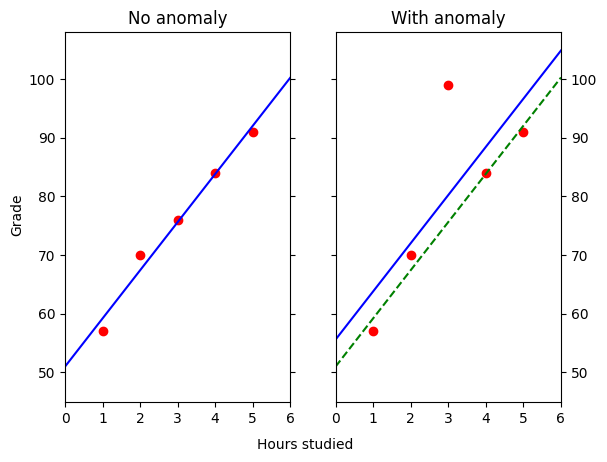

In [5]:
fig, axes = plt.subplots(1,2,sharex=True) #складається із двох графіків із спільною віссю Х

# Змініть осі, щоб вони виглядали гарно
axes[0].set_xlim([0, 6.01])
start_x, end_x = axes[0].get_xlim()
stepsize_x = 1
axes[0].xaxis.set_ticks(np.arange(start_x, end_x, stepsize_x)) # для першої осі Х
axes[0].yaxis.set_ticks_position('both')
axes[0].set_ylim([45, 108]) # межі по У першого графіка
axes[1].set_ylim(axes[0].get_ylim())
axes[1].yaxis.tick_right() # Display tick values on the right for clarity / показує значення точок справа
axes[1].yaxis.set_ticks_position('both')

# Fit a straight straight line to the linear data
lr = linear_model.LinearRegression().fit(exam_data1[:,0:1], #значення незалежної змінної Х, які записані стовпцем
                                         exam_data1[:,1]) # значення залежної змінної У, які записані рядком
axes[0].plot(*exam_data1.T, 'ro') #будуємо графік з точок із транспонованих даних / (*) використовується для передачі змінної кількості аргументів функції,
                                    #та списку аргументів змінної довжини.
plot_mb(lr.coef_, lr.intercept_, axes[0], 'b-' ) # .coef_  -кутов. коеф.,  .intercept_ -вільний член

# Підгонка прямої лінії до даних з аномаліями
lr2 = linear_model.LinearRegression().fit(exam_data2[:,0:1],
                                         exam_data2[:,1])
axes[1].plot(*exam_data2.T, 'ro')

# Побудуйте дві лінійні відповідності: за даними з аномаліями та за нормальними даними
plot_mb(lr2.coef_, lr2.intercept_, axes[1], 'b-')
plot_mb(lr.coef_, lr.intercept_, axes[1], 'g--')

axes[0].set_title('No anomaly')
axes[1].set_title('With anomaly')
fig.text(0.5, 0.02, 'Hours studied', ha='center', va='center')
fig.text(0.05, 0.5, 'Grade', ha='center', va='center', rotation='vertical')
plt.show()

Як ми бачимо, усі дані ліворуч лежать близько до регресійної моделі (синя лінія), тоді як для даних праворуч ми бачимо, що є точка, яка знаходиться далеко від лінії. Ця точка (3, 99) є аномалією.

**Примітка.** На панелі праворуч є дві лінії: регресійна модель для даних з аномалією (суцільна блакитна лінія) і модель, отримана з нормальних даних на лівій панелі (пунктирна зелена лінія). Різниця між цими двома лініями зумовлена самою аномалією (всі інші точки не змінені). Тобто аномалії впливають на модель регресії.

Саме тому, що аномалії впливають на регресійну модель, ми робимо розподіл тренування/тесту, щоб переконатися, що лінійна відповідність відображає лише нормальні дані. Звичайно, такий підхід передбачає, що ми можемо мати (або можемо створити) навчальний набір лише з нормальними даними.

Тепер ми розглядатимемо «exam_data1» (без аномалії) як набір тренувальних даних, а «exame_data2» (з аномалією) — як тестовий набір даних.

По-перше, ми підбираємо наш набір тренувальних даних. Ми будемо використовувати функцію LinearRegression from_sklearn_, як і раніше. Згадаймо, що оцінка аномалії є квадратом помилки для кожної точки.

In [6]:
ftrs, tgt = exam_data1[:,0:1], exam_data1[:,1]
lr_train = linear_model.LinearRegression().fit(ftrs, tgt)
print(f'Slope: {lr_train.coef_}')
print(f'Intercept: {lr_train.intercept_:.{3}}')
train_scores = (tgt - lr_train.predict(ftrs))**2 # оцінка: квадрат відхилень емпіричних і розрахункових даних (у)
print(train_scores)

Slope: [8.2]
Intercept: 51.0
[4.84 6.76 0.16 0.04 1.  ]


In [7]:
print(exam_data1[:,0:1])
exam_data1[:,1]

[[1]
 [2]
 [3]
 [4]
 [5]]


array([57, 70, 76, 84, 91])

Давайте встановимо порогове значення для виявлення аномалії трохи вище максимального квадрату відхилень емпіричних і розрахункових даних (у) з набору тренувальних даних.

In [8]:
margin = 0.01
threshold = max(train_scores) + margin
print(f'Threshold: {threshold:.{3}}')

Threshold: 6.77


Тепер давайте обчислимо аномальні значення  квадратів відхилень  для тестових даних.

In [9]:
def do_linreg_anomaly_scores(train, test):
    ftrs, tgt = train[:,0:1], train[:,1]
    lr_train = linear_model.LinearRegression().fit(ftrs, tgt)
    anom_score = (test[:,1] - lr_train.predict(test[:,0:1]))**2
    return anom_score

In [10]:
print(do_linreg_anomaly_scores(exam_data1, exam_data2))

[  4.84   6.76 547.56   0.04   1.  ]


Ми бачимо, що середня точка (index=2) перевищує поріг. Це аномалія, яку ми внесли в дані. Для перевірки ми можемо порівняти наведену вище оцінку аномалії з навчальними даними.

In [11]:
print(train_scores)

[4.84 6.76 0.16 0.04 1.  ]


Як і очікувалося, два набори оцінок відрізняються лише аномальною точкою.

## Розділ 2: Аналіз головних компонентів. Principal component analysis(PCA)¶
У цьому розділі ми збираємося використовувати синтетичні набори даних для виявлення аномалій за допомогою PCA. У вправах ми застосуємо те, що навчилися, до реального набору даних.

Як розрахувати аномалні точки на основі PCA:

1. Попередня обробка даних (за потреби)

2. Обчисліть головні компоненти (PCs) центрованих даних

3. Спроектуйте наші дані  на PCs

4. Обчисліть відстань між вихідним і спроектованим даними

5. Використовуйте відстань, щоб оцінити аномалії

# Дані

Ми починаємо з даних, показаних у лекції: простий двовимірний набір синтетичних даних: ($X_1, X_2$). Щоб продемонструвати, як працює PCA, ми беремо $X_2 = X_1/2$ для всіх пар, крім однієї, де ми зробили невелику зміну: (0,5, 0,26). Ця точка і є аномалією.

In [12]:
pca_example = np.array([[-3, -1.5], [-2.5, -1.25], [-1.5, -0.75],
                        [-1, -0.5], [-0.5, -0.25], [0, 0], [0.5, 0.26],
                        [1, 0.5],  [1.5, 0.75], [2.5, 1.25], [3, 1.5]])

Що таке середнє значення даних?

In [13]:
mean_pca_example = np.mean(pca_example, axis=0, keepdims=True) #середнє по змінних х1 і х2
mean_pca_example

array([[0.    , 0.0009]])

А як щодо дисперсії? Ми хочемо переконатися, що дисперсія в кожному напрямку приблизно однакова (інакше щось тривіальне, як-от зміна одиниці вимірювання з метрів на міліметри, різко змінить головні компоненти).

In [14]:
var_pca_example = np.var(pca_example, axis=0, keepdims=True) # дисперсія по змінних х1 і х2
var_pca_example

array([[3.4091, 0.8527]])

Оскільки середнє значення цих даних (практично) дорівнює нулю, нам не потрібно виконувати віднімання середнього. Однак ми повинні виправити різні відхилення. Типовий підхід полягає в тому, щоб поділити кожен компонент на його стандартне відхилення, при цьому дисперсія в кожному напрямку дорівнює 1.

In [15]:
scaled_pca_example = pca_example/np.sqrt(var_pca_example) # нормування даних z=mu/sigma

# show the variances are equal
scaled_pca_example.var(axis=0) # дисперсія по нормованих змінних х1 і х2 (має =1)

array([1., 1.])

#### Давайте побудуємо вихідні (тобто немасштабовані) дані

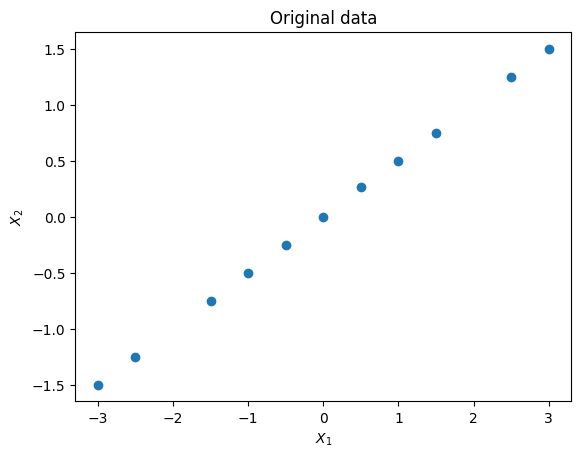

In [16]:
fig, ax = plt.subplots()
ax.scatter(pca_example[:,0], pca_example[:,1])
ax.set_ylabel('$X_2$')
ax.set_xlabel('$X_1$')
ax.set_title('Original data')
plt.show()

Чи можете ви помітити аномалію?

Щоб показати, на що здатний PCA, ми застосуємо його до нашого набору даних і подивимося на результати (за допомогою PCA від *sklearn*). Ми очікуємо, що перша головна компонента буде лежати вздовж лінії $X_2 = X_1/2$, оскільки це напрямок, у якому дані змінюються найбільше. І враховуючи те, як ми побудували набір даних, не буде майже ніяких змін уздовж другої головної компоненти, за винятком аномалії.

Виконання PCA за допомогою Scikit-Learn є двоетапним процесом:
Ініціалізуйте клас PCA, передавши конструктору кількість компонентів n_components= .
Викличте методи підгонки (fit), а потім трансформуйте, передавши набір функцій цим методам. Метод transform повертає вказану кількість основних компонентів.

Замість виклику методу fit_transform() ви також можете вибрати fit(), а потім метод transform().

підгонка моделі fit_transform(X) за допомогою X і використовуйте зменшення розмірності до X.

In [17]:
pca = decomp.PCA(n_components=2) #встановлюємо кількість компонент  і кількість векторів, на які будуть проектуватися дані
pca.fit(scaled_pca_example) #застосовуємо PCA по нормованих даних

PCA(n_components=2)

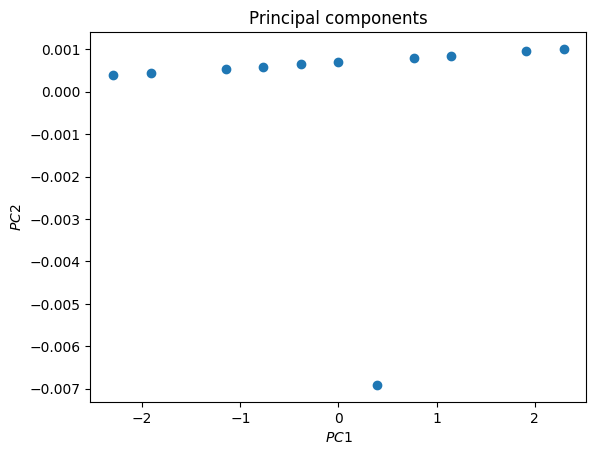

In [18]:
pca_example_trf = pca.transform(scaled_pca_example) # отримали набір спроектованих даних на вектори
fig2, ax2 = plt.subplots()
ax2.scatter(pca_example_trf[:,0], pca_example_trf[:,1])
ax2.set_ylabel('$PC2$')
ax2.set_xlabel('$PC1$')
ax2.set_title('Principal components')
plt.show()

Аномалія очевидна.

#### Аналіз

Тепер підемо більш формально. Ми створюємо функцію для виконання PCA на 2D-даних, дотримуючись п’яти кроків, описаних на початку цього розділу.

Замість того, щоб самостійно виконувати центрування та нормалізацію середнього значення, ми будемо використовувати StandardScaler, вбудований у scikit-learn.

In [19]:
def get_1d_projected_vectors(obs, pca_object):
    # Примітка: Проекція вектора a (дані) уздовж вектора b (PC1)
     # визначається як [b / len(b)]* (len (a) cos (theta))
     # де theta - кут між a і b і елементом в
     # квадратних дужка є одиничним вектором у напрямку b
     #
     # Оскільки cos (theta) = dot(a,b)/(len(a)len(b))
     # проекцію можна записати як
     # projs = b*[dot(a,b)/len(b)^2]
     #
     # Елемент у квадратних дужках - y_lengths
     # projs обчислюється додаванням середнього значення
     # віднятого раніше, щоб центрувати дані
     #
     # Це дуже чіткий спосіб проведення обчислень.
     # Перегляньте примітки у «вищому вимірі», щоб побачити спосіб узагальнення
     # це до вищих розмірів, одночасно інкапсулюючи векторну математику.

    ssX = StandardScaler()
    centered_data = ssX.fit_transform(obs) #нормалізація даних
    pca_dirs = pca_object.components_ #Головні осі(вектори головних компонент записані по стрічках  b)

    y_lengths = centered_data.dot(pca_dirs.T) / pca_dirs.dot(pca_dirs.T)  # обчислення dot(a,b)/len(b)^2
    centered_projs = y_lengths*(pca_dirs)  # обчислення проекції [dot(a,b)/len(b)^2]*b

    # Return the data to its original uncentered (and unscaled) positions
    return ssX.inverse_transform(centered_projs) #Повернути спроектовані дані до вихідних нецентрованих (і немасштабованих) позицій

def do_pca_anomaly_scores(obs, pca_object):
    projected_vectors = get_1d_projected_vectors(obs, pca_object)
    return nla.norm(obs-projs, axis=1)  #тут напевне помилка

In [20]:
def do_1d_pca_anomaly_scores(obs):
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_ylabel('$X_2$')
    ax.set_xlabel('$X_1$')
    ax.set_title('Original data with PCA')

    # draw data
    ax.scatter(*obs.T, label='data')

    # Step 1: center and scale the data
    ssX = StandardScaler()
    centered_data = ssX.fit_transform(obs) #нормалізує
    mean = ssX.mean_ #беремо середнє значення

    #for completeness, show mean on plot
    ax.scatter(*mean.T, c='k', marker='^', label='mean')

    # Step 2: compute prinicpal components
    # Here we focus on first PC  (greatest proportion of variance)
    pca = decomp.PCA(n_components=1)
    pca.fit_transform(centered_data)
    pca_dirs = pca.components_ #Головні осі(вектори по стрічках) в просторі ознак, що представляють напрямки максимальної дисперсії в даних.

    # draw principal components
    pca_endpoints = np.r_[-3.5*ssX.inverse_transform(pca_dirs),
                           3.5*ssX.inverse_transform(pca_dirs)]  #утворення масиву з перетворенням даних назад у вихідний простір (без нормування).
    ax.plot(*pca_endpoints.T, 'y', label='PC1')

    # Step 3: Project our examples onto the PCs
    #
    projs = get_1d_projected_vectors(obs, pca)
    ax.plot(*projs.T, 'r.', label='projected data')
    ax.legend(loc='best')

    # Step 4: Calculate distance between original and projected examples
    # Step 5: Use the distance to score the anomalies
    # The distance is the Euclidean norm and
    # we use it as the anomaly score
    return nla.norm(obs-projs, axis=1) # норма Фробеніуса- відстань між вхідними і спроектованими даними

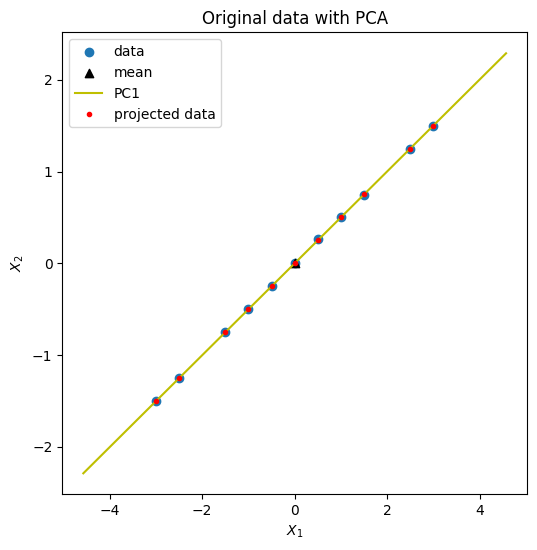

In [21]:
pca_example_scores = do_1d_pca_anomaly_scores(pca_example)

Графік показує, що дані (сині), дані, спроектовані на PC1 (червоні точки на жовтій лінії), і середнє значення даних, використаних для центрування (чорний трикутник). Відповідно до побудови, PC1 проходить через середнє значення, яке розташоване на (0,0) – це важко побачити, оскільки там також є точка даних і прогнозована точка даних.

Оскільки дані знаходяться дуже близько до PC1, важко побачити аномалію. Тому ми дивимося на аномалні точки.

In [22]:
print(pca_example_scores)

[0.0006 0.0006 0.0008 0.0009 0.0009 0.001  0.0101 0.0012 0.0012 0.0014
 0.0015]


Ми бачимо одне значення (0,0101), яке набагато більша за інші. Якій точці це відповідає?

In [23]:
print(pca_example[np.argmax(pca_example_scores)])

[0.5  0.26]


Це аномалія в даних. PCA спрацював!

Ми повторюємо аналіз із шумнішими даними: два гаусівські кластери з двома аномаліями (6,0, 6,0) і (0,0, 10,0).

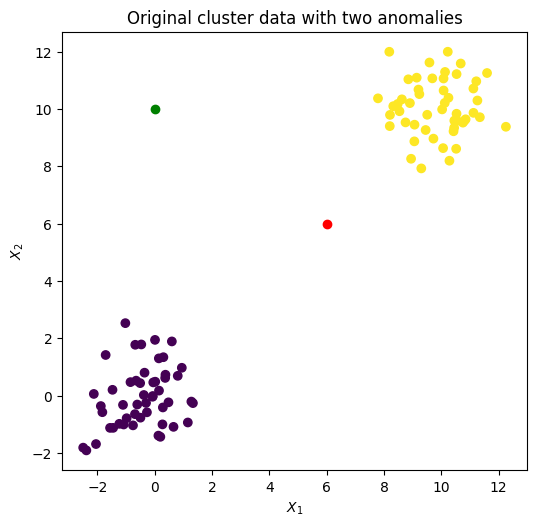

In [24]:
blobs_X, y = sk_data.make_blobs(centers=[[0,0], [10,10]]) #Створення ізотропних гауссових точок для кластеризації / за замовчуванням 100 точок по 50 в кожному кластері.
figure, axes = plt.subplots(figsize=(6,6))
axes.scatter(*blobs_X.T, c=y)

spike_1 = np.array([[6.0,6.0]]) # Anomaly 1
spike_2 = np.array([[0.0,10]])  # Anomaly 2
axes.scatter(*spike_1.T, c='r')
axes.scatter(*spike_2.T, c='g')
axes.set_aspect('equal') #співвідношення сторін у до х
axes.set_ylabel('$X_2$')
axes.set_xlabel('$X_1$')
axes.set_title('Original cluster data with two anomalies')

# Об’єднайте дані так, щоб останні дві точки були аномаліями
cluster_data = np.concatenate([blobs_X, spike_1, spike_2])


Реалізуйте PCA

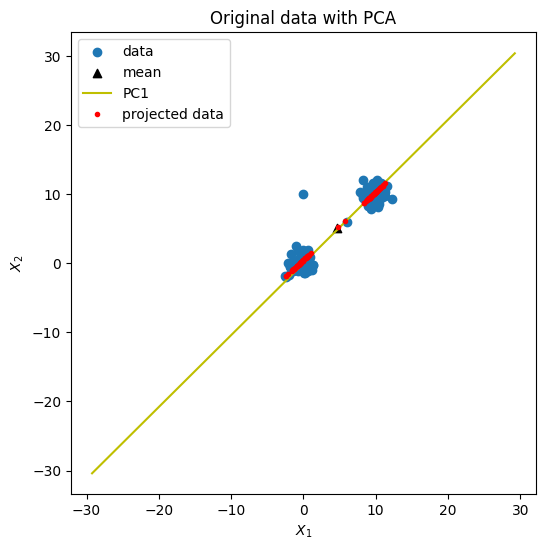

In [25]:
cluster_data_scores = do_1d_pca_anomaly_scores(cluster_data)

За допомогою цього набору даних різниця між вихідними та прогнозованими даними очевидна – лише деякі варіації в даних можна пояснити, спроектувавши їх на лінію. (Зверніть увагу, що середнє значення (чорний трикутник) також проектується на PC1.)

Подивіться на аномальні точки.

In [26]:
print(cluster_data_scores)
print(cluster_data_scores.shape)

[0.3133 0.3055 0.9755 0.3631 1.2587 1.067  0.0356 0.4401 0.401  0.3566
 0.5684 1.3644 0.6977 0.8251 1.0727 0.847  0.6907 0.7657 1.1879 0.3239
 0.1802 0.5439 0.4766 0.1499 0.8246 0.484  1.2348 0.3236 0.3248 1.2069
 0.4412 0.4143 1.8683 1.5812 0.0476 0.0161 0.7622 0.0211 1.0704 0.5865
 0.01   0.8879 0.1132 0.6146 1.2491 1.5976 1.4301 0.4914 0.0858 1.8222
 0.3193 0.7146 1.0505 1.3287 0.0542 0.3822 2.1794 0.8974 0.303  1.0371
 2.2397 0.0621 1.2306 0.5246 0.22   1.4648 1.5073 1.5709 0.2784 0.1386
 0.1296 0.5529 0.3132 1.7035 0.3216 1.0007 0.1876 0.4829 0.8337 0.6177
 1.0279 0.7168 0.2469 0.9878 0.1124 1.1653 0.1588 1.3883 0.7078 1.0995
 0.7512 2.4802 0.8913 0.8374 0.2018 0.488  1.3983 0.5853 0.1104 1.0853
 0.2676 6.7917]
(102,)


Точка з найбільшою оцінкою є однією з наших засіяних аномалій.

In [27]:
print(max(cluster_data_scores))
print(cluster_data[np.argmax(cluster_data_scores)])

6.791688595158378
[ 0. 10.]


Завдяки тому, як ми побудували наш набір даних, ми знаємо, що останні два точки є аномаліями.

Це (0.0, 10.0), яка має індекс=101, це точка, яку ми знайшли вище.

Інша (6,0, 6,0) з індексом=100 має оцінку аномалії 0,0886, що є дуже низьким. Це тому, що він розташований дуже близько до PC1.

Цей приклад показує обмеження PCA для виявлення аномалій за допомогою кластерних даних. Для таких даних слід також спробувати методи наближення (див. урок 4).

### Для великої розмірності даних

У функції `do_pca_anomaly_scores` ми викликали допоміжну функцію `get_projected_vectors`, яка знаходила проекцію векторів у нашому наборі даних на головний напрямок. Віднімаючи спроектований вектор з вихідного вектора, ми могли б знайти довжину ортогональних компонентів, які ми використовували для оцінки.

Використаний підхід працював в одному основному напрямку та значною мірою покладався на векторну математику. Ми можемо попросити (підігнаний) об’єкт `pca` виконувати важку роботу за нас:
1. `reduced = pca.tranform(X)` візьме наші $N$-вимірні вектори та спроектує їх на $d$-вимірний підпростір. У нашому прикладі $N=2$ і $d=1$.
2. `projected = pca.inv_transform(reduced)` вбудує скорочені вектори назад у наш $N$-вимірний підпростір
3. `X - projected` - це компоненти векторів, які не лежать у нашому підпросторі.

In [28]:
def get_projected_vectors(X, pca, ssX=None):
    if not ssX:
        ssX = StandardScaler().fit(X)
    centered_data = ssX.transform(X)
    reduced = pca.transform(centered_data)
    # To get back to the original space, we need to undo the PCA
    # as well as undo the scaling/centering step.
    return ssX.inverse_transform(pca.inverse_transform(reduced))

In [29]:
# Show that it does the same thing as the previous version
def do_pca_anomaly_scores(obs, n_components=1):
    ssX = StandardScaler()
    centered_data = ssX.fit_transform(obs)
    pca = decomp.PCA(n_components=n_components)
    pca.fit(centered_data)

    projected_vectors = get_projected_vectors(obs, pca)
    return nla.norm(obs - projected_vectors, axis=1)

# check that the two answers agree
do_pca_anomaly_scores(pca_example) - pca_example_scores #перевірка правильності для двох методів

array([ 0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0.,  0.])

Наш високовимірний аналог повертає той самий результат, що й векторна арифметика вручну!

## Розділ 3: Однокласова опорна векторна машина (SVM)¶
У цьому розділі ми використаємо кластерний набір даних, створений у попередньому розділі, для виявлення аномалій за допомогою однокласової SVM. У вправах ми застосуємо те, що навчилися, до реального набору даних.

Як ми обговорювали в лекції, однокласова SVM намагається знайти гіперплощину з найбільшим розривом між нормальним і аномальним класами. Як правило, дані не використовуються як є, а перетворюються за допомогою «трюку ядра» (див. лекцію).

Ми будемо використовувати однокласовий SVM, реалізований у sklearn, який за замовчуванням використовує радіальну базисну функцію (RBF). Вхідними даними для ядра RBF є параметр gamma, і ми також використовуємо його значення за замовчуванням. (Обговорення ядра виходить за рамки цього уроку. Для отримання додаткової інформації див.

Однокласовий SVM зазвичай повертає аномалії (-1) або нормальні точки (+1). Однак ми зацікавлені в отриманні точок, а потім у рейтингу за оцінками. Тому ми будемо використовувати надану `decision_function`, яка повертає відстань зі знаком до розділової гіперплощини (від’ємні відстані є аномаліями). Щоб бути узгодженим із попередньою угодою, де більші позитивні оцінки відображають більше аномальних точок, нам потрібно взяти негативне значення `decision_function`.

In [30]:
def do_svm_anomaly_scores(obs):

    oc_svm = svm.OneClassSVM(gamma='auto').fit(obs)  #Визначте м’яку границю набору даних X
    scores = oc_svm.decision_function(obs).flatten() #Відстань зі знаком до розділової гіперплощини, якщо мінус, то аномалія / flatten - розгортає багатовимірний масив в одновимірний- в стрічку.

    # Find the largest score and use it to normalize the scores
    max_score = np.max(np.abs(scores))

    # scores from oc_svm use "negative is anomaly"
    # To follow our previous convention
    # we multiply by -1 and divide by the maximum score to get scores
    # in the range [-1, 1] with positive values indicating anomalies
    return - scores / max_score #для зручності поміняємо знак оцінок; додатні оцінки вказують на аномалію

Застосуйте однокласовий SVM до набору даних кластера з попереднього розділу. Подивіться як на вихідні точки, так і на перші п’ять точок (за оцінками).

In [31]:
print(do_svm_anomaly_scores(cluster_data))
print (do_svm_anomaly_scores(cluster_data).argsort()[-5:])

[-0.0152 -0.0098 -0.      0.0474  0.0351 -0.0042  0.381   0.303   0.
 -0.0153 -0.0254  0.0878 -0.0326 -0.0179 -0.0027 -0.0306 -0.0206 -0.0119
  0.2105 -0.0111 -0.0235 -0.0176 -0.0265 -0.0119 -0.0166  0.      0.0377
 -0.0017 -0.      0.3238  0.1257  0.0736  0.3675  0.0596 -0.0118 -0.0001
 -0.0172 -0.0117  0.0001  0.2352 -0.0136  0.0136  0.222  -0.      0.
  0.2759  0.1218 -0.0001 -0.0073  0.17   -0.0106  0.0345  0.2723  0.0536
  0.0022  0.0678  0.4628 -0.0158 -0.0114  0.0941  0.5772 -0.0032  0.1205
 -0.     -0.0363  0.1791  0.1421  0.1271 -0.0051 -0.0221  0.      0.0129
  0.1545  0.2254 -0.0293 -0.0061 -0.0318 -0.0302  0.0332  0.1561  0.0336
  0.2544  0.0001 -0.0145 -0.0305  0.0278 -0.0071  0.1555 -0.0269  0.009
 -0.0074  0.6047  0.0844 -0.0402 -0.0474 -0.0292  0.0659  0.0072  0.3834
 -0.      0.9996  1.    ]
[ 56  60  91 100 101]


 Дві початкові аномалії (індекс=100 і 101) є двома найвищими оцінками. Продуктивність краща, ніж PCA, але процес виявлення аномалій менш прозорий.

### вправи

#### Дані
Для всіх вправ ми будемо використовувати набір даних реального світу: набір даних іоносфери з репозиторію бази даних машинного навчання UCI. Цей набір даних складається з радіолокаційних сигналів від іоносфери та спочатку використовувався для класифікації результатів як хороших (придатних для подальших досліджень) і поганих. Більше інформації доступно тут: https://archive.ics.uci.edu/ml/datasets/ionosphere.

Для цілей цього блокнота ми адаптували набір даних для виявлення аномалій. Ми видалили два стовпці: один із мітками класів (хороший чи поганий), а інший був константою (0) для всіх екземплярів даних.

Ми читаємо дані як фрейм даних pandas, а потім поміщаємо їх у масив numpy для сумісності з нашими існуючими функціями

In [32]:
ion_df = pd.read_csv('..\\data\\ionosphere_data.csv', header=None)
ion_data = np.array(ion_df.values)

Подивіться на дані

In [33]:
ion_data.shape

(351, 33)

### Вправа №1
Ця вправа відноситься до Розділу 1 (модель лінійної регресії)

Файл Summing Amplifier.xlsx містить дані вхідної напруги V1 та V2 та значення вихілної напруги суматора VOUT.  Створіть функцію linreg_anomaly_scores, яка повертає показники аномалій лінійної регресійної моделі (двофакторноъ), де надаються три вхідних  набори даних: V1, V2 та VOUT, яка є залежною змінною.

Знайдіть аномалію з найбільшим збуренням, а також виведіть п.ять точок із найбільшими збуреннями

In [34]:
import pandas as pd

volt = pd.read_excel('..\\data\\Inv Summing Amplifier.xlsx', parse_dates=True)
volt

,V1,V2,VOUT
0,0.5055,9.5073,-10.0259
1,0.0007,9.5054,-9.5191
2,-0.4990,9.5038,-9.0153
3,-1.0043,9.5028,-8.5070
4,-1.4991,9.5024,-8.0101
...,...,...,...
1271,1.0035,-9.5005,8.5085
1272,0.4977,-9.5006,9.0164
1273,-0.0006,-9.5006,9.5161
1274,-0.4929,-9.5007,10.0112


In [35]:
print(volt)

          V1      V2     VOUT
0     0.5055  9.5073 -10.0259
1     0.0007  9.5054  -9.5191
2    -0.4990  9.5038  -9.0153
3    -1.0043  9.5028  -8.5070
4    -1.4991  9.5024  -8.0101
...      ...     ...      ...
1271  1.0035 -9.5005   8.5085
1272  0.4977 -9.5006   9.0164
1273 -0.0006 -9.5006   9.5161
1274 -0.4929 -9.5007  10.0112
1275 -1.0018 -9.5008  10.5213

[1276 rows x 3 columns]


In [36]:
# Розділення змінних
X_volt = volt[['V1', 'V2']].values  # незалежні змінні
Y_volt = volt['VOUT'].values        # залежна змінна

In [37]:
X_volt.shape

(1276, 2)

In [38]:
import numpy as np
from sklearn.linear_model import LinearRegression


def linreg_anomaly_scores(X, Y):
    model = LinearRegression()
    model.fit(X, Y)
    Y_pred = model.predict(X)

    # Обчислення абсолютних залишків
    residuals = np.abs(Y - Y_pred)

    # Використовуємо нормалізацію (мін-макс)
    normalized_scores = (residuals - np.min(residuals)) / (np.max(residuals) - np.min(residuals))

    return normalized_scores

In [39]:
print(X_volt.view())

[[ 0.5055  9.5073]
 [ 0.0007  9.5054]
 [-0.499   9.5038]
 ...
 [-0.0006 -9.5006]
 [-0.4929 -9.5007]
 [-1.0018 -9.5008]]


In [40]:
anomaly_scores_reg=linreg_anomaly_scores(X_volt, Y_volt).flatten()
print(anomaly_scores_reg)

[0.0007 0.0042 0.0027 ... 0.0029 0.0048 0.0033]


In [41]:
max_anomaly_scores_reg=np.argmax(anomaly_scores_reg)
print(max_anomaly_scores_reg)

964


In [42]:
print(anomaly_scores_reg.argsort()[-5:])

[ 726 1199 1110  705  964]


### Вправа №2

Ця вправа відноситься до розділу 2 (PCA).

Створіть функцію `pca_anomaly_scores`, яка повертає оцінки аномалій моделі PCA, де надаються два вхідні дані: дані та кількість компонентів. Ми використаємо цю функцію у вправі 4 для аналізу даних іоносфери.

In [43]:
ion_df = pd.read_csv('..\\data\\ionosphere_data.csv', header=None)
ion_data = np.array(ion_df.values)
ion_data

array([[ 1.    ,  0.9954, -0.0589, ..., -0.5449,  0.1864, -0.453 ],
       [ 1.    ,  1.    , -0.1883, ..., -0.0629, -0.1374, -0.0245],
       [ 1.    ,  1.    , -0.0336, ..., -0.2418,  0.5605, -0.3824],
       ...,
       [ 1.    ,  0.947 , -0.0003, ...,  0.0044,  0.927 , -0.0058],
       [ 1.    ,  0.9061, -0.0166, ..., -0.0376,  0.874 , -0.1624],
       [ 1.    ,  0.8471,  0.1353, ..., -0.0668,  0.8576, -0.0615]],
      shape=(351, 33))

In [44]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


def pca_anomaly_scores(obs, n_components=1):
   # Нормалізація даних
   scaler = StandardScaler()
   data_scaled = scaler.fit_transform(obs)

   # Застосування PCA
   pca = PCA(n_components=n_components)
   data_pca = pca.fit_transform(data_scaled)

   # Відновлення даних
   data_reconstructed = pca.inverse_transform(data_pca)

   # Повернення до вихідного масштабу
   data_reconstructed = scaler.inverse_transform(data_reconstructed)

   # Помилка відновлення як норма різниці
   anomaly_scores = np.linalg.norm(obs - data_reconstructed, axis=1)

   return anomaly_scores

In [45]:
pca_anomaly_scores(ion_data,1)[-15:]

array([2.1176, 3.    , 1.6635, 2.8565, 1.7699, 0.5604, 0.3684, 0.7255,
       0.2744, 1.5301, 0.6216, 0.4879, 0.4456, 0.4909, 0.5296])

In [46]:
max_pca_anomaly_scores=np.argmax(pca_anomaly_scores(ion_data,1))
print(max_pca_anomaly_scores)
print (pca_anomaly_scores(ion_data).argsort()[-5:])

162
[220  29  53  17 162]


### Вправа №3

Ця вправа відноситься до Розділу 3 (однокласовий SVM).

Створіть функцію `svm_anomaly_scores`, яка повертає оцінки аномалій однокласової моделі SVM, де надаються два набори вхідних даних: дані та ядро. Ми використаємо цю функцію у вправі 4 для аналізу даних іоносфери.

In [47]:
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler


def svm_anomaly_scores(obs, kernel='linear'):
   # Нормалізація даних
   scaler = StandardScaler()
   obs_scaled = scaler.fit_transform(obs)

   # Ініціалізація та навчання моделі One-Class SVM
   oc_svm = OneClassSVM(kernel=kernel, gamma='scale')
   oc_svm.fit(obs_scaled)

   # Оцінка аномалій (від'ємні значення - ймовірні аномалії)
   anomaly_scores = -oc_svm.decision_function(obs_scaled)

   return anomaly_scores

In [48]:
print(svm_anomaly_scores(ion_data, 'linear')[-10:])
print(svm_anomaly_scores(ion_data, 'linear').argsort()[-5:])

[ 0.      0.      0.0001  0.      0.0001 -0.      0.     -0.     -0.
  0.    ]
[142 208  39   1 100]


### Вправа №4

Тепер у нас є три функції `[method]_outlier_scores`. Застосуйте кожен із них до набору даних іоносфери. Які п’ять найаномальніших точок отримуємо при використанні кожної техніки?

In [49]:
# Ділимо дані
X_ion = ion_data[:, :-1]
Y_ion = ion_data[:, -1]

# Обчислюємо аномалії
anomaly_scores_reg = linreg_anomaly_scores(X_ion, Y_ion)
pca_anomaly_scores_result = pca_anomaly_scores(ion_data)
svm_anomaly_scores_result = svm_anomaly_scores(ion_data)

# Отримуємо п'ять найаномальніших точок для лінійної регресії, PCA, SVM
top_5_anomalies_reg = anomaly_scores_reg.argsort()[-5:][::-1]
top_5_anomalies_pca = pca_anomaly_scores_result.argsort()[-5:][::-1]
top_5_anomalies_svm = svm_anomaly_scores_result.argsort()[-5:][::-1]

# Виводимо ці значення
print(f"Топ-5 аномалій за допомогою лінійної регресії: {top_5_anomalies_reg}")
print(f"Топ-5 аномалій з використанням РСА: {top_5_anomalies_pca}")
print(f"Топ-5 аномалій з використанням однокласового SVM: {top_5_anomalies_svm}")

Топ-5 аномалій за допомогою лінійної регресії: [ 31 216  39 184  17]
Топ-5 аномалій з використанням РСА: [162  17  53  29 220]
Топ-5 аномалій з використанням однокласового SVM: [100   1  39 208 142]


Два різні методи, дві різні відповіді. Тому потрібне більше дослідження, до якого ми заохочуємо студента. Наприклад,  збільшення кількості компонентів у PCA; або змінити ядро на однокласну SVM.

Останню пропозицію можна легко реалізувати для ядра RBF, оскільки ми використовували її в розділі 3.

In [50]:
import sklearn.svm as svm

def do_svm_anomaly_scores(obs):

    oc_svm = svm.OneClassSVM(gamma='auto').fit(obs)  #Визначте м’яку границю набору даних X
    scores = oc_svm.decision_function(obs).flatten() #Відстань зі знаком до розділової гіперплощини, якщо мінус, то аномалія / flatten - розгортає багатовимірний масив в одновимірний- в стрічку.

    # Find the largest score and use it to normalize the scores
    max_score = np.max(np.abs(scores))

    # scores from oc_svm use "negative is anomaly"
    # To follow our previous convention
    # we multiply by -1 and divide by the maximum score to get scores
    # in the range [-1, 1] with positive values indicating anomalies
    return - scores / max_score #для зручності поміняємо знак оцінок; додатні оцінки вказують на аномалію

In [51]:
print(
    sorted(
        do_svm_anomaly_scores(ion_data).argsort()[-5:]
    )
)

[np.int64(17), np.int64(29), np.int64(53), np.int64(162), np.int64(220)]
